In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


dataAribnb = pd.read_csv('AB_NYC_2019.csv')

## 1. Exploratory Data Analysis (EDA)

In [2]:
dataAribnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
dataAribnb.info()
dataAribnb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
# Drop rows with missing 'name' and 'host_name'
dataAribnb.dropna(subset=['name', 'host_name'], inplace=True)

# Impute missing values in 'last_review' and 'reviews_per_month' with median or forward-fill
dataAribnb['last_review'].fillna(method='ffill', inplace=True)
dataAribnb['reviews_per_month'].fillna(dataAribnb['reviews_per_month'].median(), inplace=True)
dataAribnb.describe()

/var/folders/r6/0smcfgt9415gwpc747f7ghth0000gn/T/ipykernel_7988/3635373139.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataAribnb['last_review'].fillna(method='ffill', inplace=True)
/var/folders/r6/0smcfgt9415gwpc747f7ghth0000gn/T/ipykernel_7988/3635373139.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataAribnb['last_review'].fillna(method='ffill', inplace=True)
/var/folders/r6/0smcfgt9415gwpc747f7ghth0000gn/T/ipykernel_7988

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.239035,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.520889,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


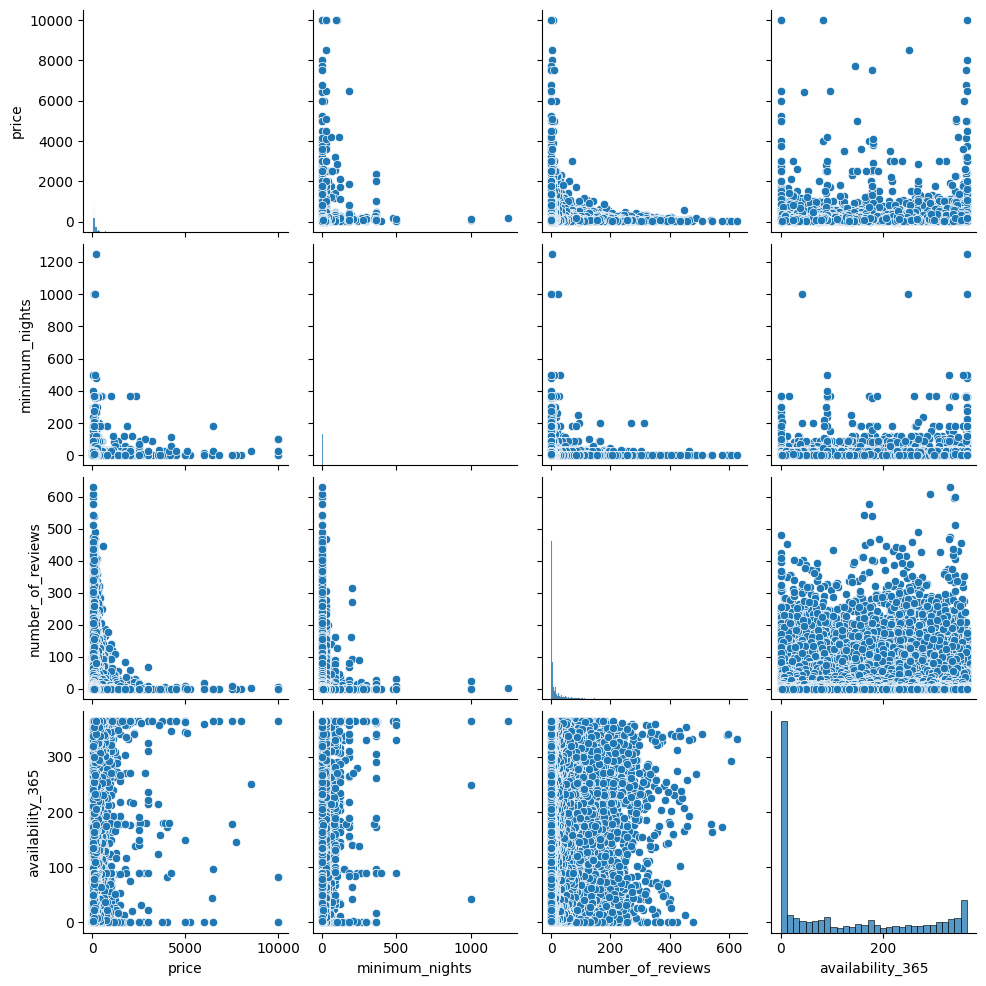

In [5]:
import seaborn as sns

# Create a pairplot
sns.pairplot(dataAribnb[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']])
plt.show()

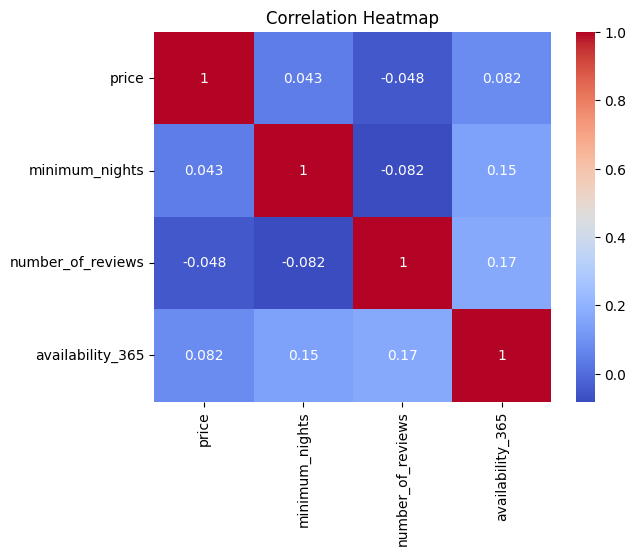

In [6]:
# Calculate correlation matrix
correlation_matrix = dataAribnb[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Task 1: For Each Comparison there should be a clear reason why we are comparing (OBJECTIVE)
- Identify Patterns between Borough/Neighborhood to Price and to Rating - Create a visual
- Create a visual for the relationship between (availability and price) and (availability and # of rating) for neighborhoods


AttributeError: module 'seaborn' has no attribute 'abarplot'

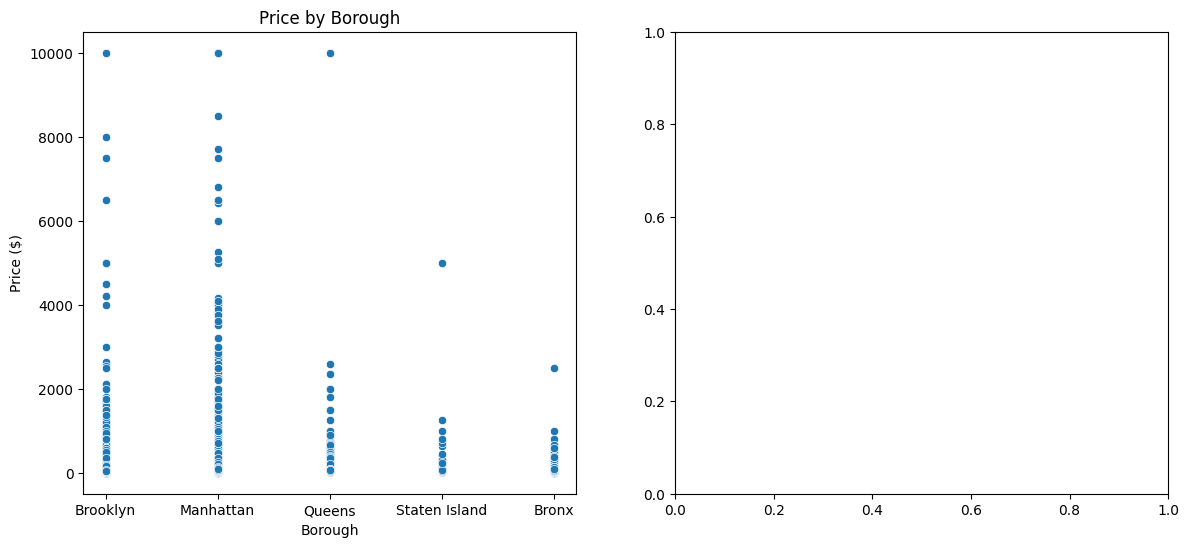

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Price vs Borough/Neighborhood Group
sns.scatterplot(data=dataAribnb, x='neighbourhood_group', y='price', ax=ax[0])
ax[0].set_title('Price by Borough')
ax[0].set_ylabel('Price ($)')
ax[0].set_xlabel('Borough')

# Reviews per Month vs Borough/Neighborhood Group
sns.abarplot(data=dataAribnb, x='neighbourhood_group', y='reviews_per_month', ax=ax[1])
ax[1].set_title('Activity (Proxy for Rating) by Borough')
ax[1].set_ylabel('Reviews per Month')
ax[1].set_xlabel('Borough')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualization for Availability vs Price
sns.scatterplot(ax=axes[0], data=dataAribnb, x='availability_365', y='price', hue='neighbourhood_group')
axes[0].set_title('Availability vs Price by Neighborhood')
axes[0].set_xlabel('Availability (Days per Year)')
axes[0].set_ylabel('Price ($)')

# Visualization for Availability vs Number of Reviews
sns.scatterplot(ax=axes[1], data=dataAribnb, x='availability_365', y='number_of_reviews', hue='neighbourhood_group')
axes[1].set_title('Availability vs Number of Reviews by Neighborhood')
axes[1].set_xlabel('Availability (Days per Year)')
axes[1].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

In [ ]:
room_type_count = dataAribnb['room_type'].value_counts().reset_index()
room_type_count.columns = ['room_type', 'count'] 

# Avg Price
room_type_price = dataAribnb.groupby('room_type')['price'].mean().reset_index()

# matplotlib figure (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Room Type vs Count
sns.barplot(ax=axes[0], data=room_type_count, x='room_type', y='count')
axes[0].set_title('Room Type vs Count')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Count')

# Room Type vs Average Price
sns.barplot(ax=axes[1], data=room_type_price, x='room_type', y='price')
axes[1].set_title('Room Type vs Average Price')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Average Price ($)')

plt.tight_layout()
plt.show()

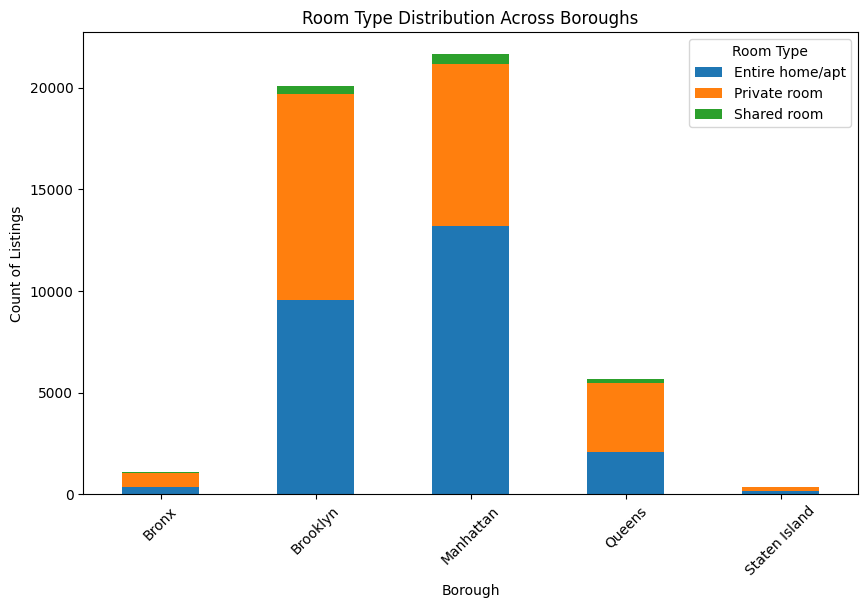

In [11]:
room_type_borough_count = dataAribnb.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0)

# stacked bar chart
room_type_borough_count.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Room Type Distribution Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)  # Rotate x-axis label for better readability
plt.legend(title='Room Type')

plt.show()

In [9]:


 

print("Minimum Longitude:", dataAribnb['longitude'].min())
print("Maximum Longitude:", dataAribnb['longitude'].max())
print("Minimum Latitude:", dataAribnb['latitude'].min())
print("Maximum Latitude:", dataAribnb['latitude'].max())

filtered_data = dataAribnb[dataAribnb['number_of_reviews'] > 50]
total_elements = filtered_data.shape[0]  # This gives you the number of rows
print("Total number of elements in filtered data:", total_elements)


Minimum Longitude: -74.24442
Maximum Longitude: -73.71299
Minimum Latitude: 40.49979
Maximum Latitude: 40.91306
Total number of elements in filtered data: 6953


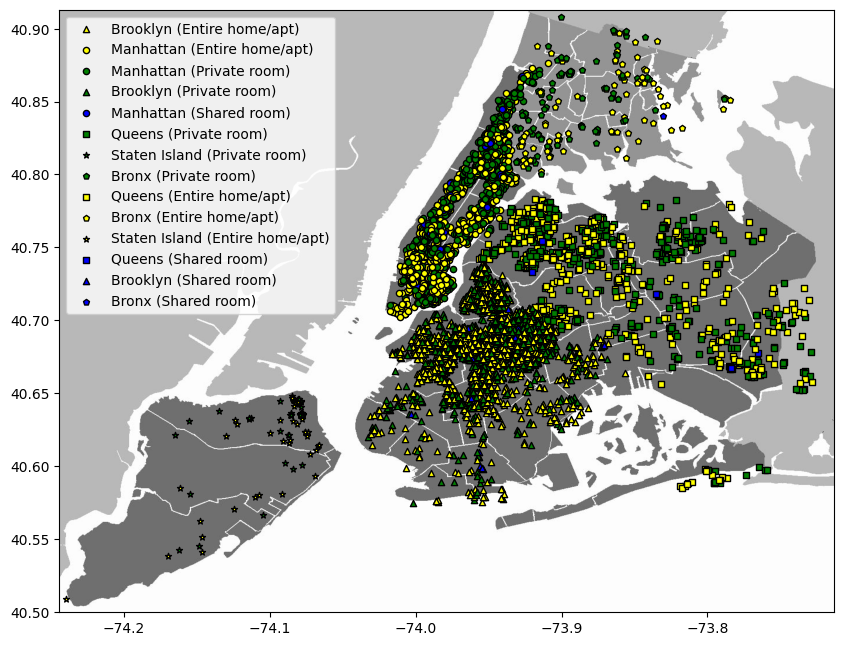

In [10]:
# This gives you all the locations with 50 reviews or more in new york city

# Read the image file
img = plt.imread('/Users/ardadinc/Desktop/Airbnb Project/New_York_City_.jpg')


plt.figure(figsize=(10, 10))


# Alter according to min and max in the code above
map_bounds = {
    'left': -74.24442, 
    'right': -73.71299, 
    'bottom': 40.49979, 
    'top': 40.91306
}

room_type_colors = {
    'Entire home/apt': 'yellow', 
    'Private room': 'green', 
    'Shared room': 'blue'
}

neighbourhood_shapes = {
    'Manhattan': 'o',  # circle
    'Brooklyn': '^',  # triangle
    'Queens': 's',  # square
    'Bronx': 'p',  # pentagon
    'Staten Island': '*'  # star
}


# Scatter plot for each data point
for i, point in filtered_data.iterrows():
    plt.scatter(
        x=point['longitude'], 
        y=point['latitude'], 
        c=room_type_colors[point['room_type']],  # color based on room type
        marker=neighbourhood_shapes[point['neighbourhood_group']],  # the shapes for the neighbourhood group
        s=20,  # Change size of the shapes
        label=f"{point['neighbourhood_group']} ({point['room_type']})", 
        edgecolor='black'
    )

plt.imshow(img, extent=[map_bounds['left'], map_bounds['right'], map_bounds['bottom'], map_bounds['top']])

# set bounds of map 
plt.xlim(map_bounds['left'], map_bounds['right'])
plt.ylim(map_bounds['bottom'], map_bounds['top'])

# create a legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

Task 2: For Each Comparison there should be a clear reason why we are compariing (OBJECTIVE)
- Create a Dataframe for Host related values ie.(calculated_host_listings_count, number_of_reviews, neighboord/borough)
- Examine geographical availability and create a visual for availability vs availability_365/price
- Examine rental metrics price/location/price


Listings' name

In [ ]:
data = dataAribnb
name_list = data.name.to_list()
#pip install tensorflow
#name_list

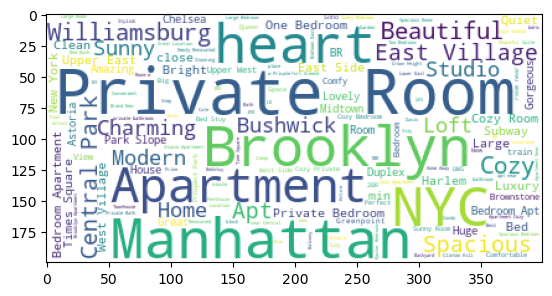

In [ ]:
from wordcloud import WordCloud
name_list = ' '.join(str(x) for x in name_list)
plt.imshow(WordCloud(background_color='white').generate_from_text(name_list))

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in data.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [ ]:
_names_for_count_
# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the list of words
_names_for_count_ = [word for word in _names_for_count_ if word.lower() not in stop_words]

In [ ]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [ ]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)
#sub_w

[Text(0, 0, 'room'),
 Text(1, 0, 'bedroom'),
 Text(2, 0, 'private'),
 Text(3, 0, 'apartment'),
 Text(4, 0, 'cozy'),
 Text(5, 0, 'studio'),
 Text(6, 0, 'brooklyn'),
 Text(7, 0, 'apt'),
 Text(8, 0, 'spacious'),
 Text(9, 0, '1'),
 Text(10, 0, '2'),
 Text(11, 0, 'east'),
 Text(12, 0, 'manhattan'),
 Text(13, 0, '&'),
 Text(14, 0, 'park'),
 Text(15, 0, 'sunny'),
 Text(16, 0, 'beautiful'),
 Text(17, 0, 'near'),
 Text(18, 0, 'williamsburg'),
 Text(19, 0, '-'),
 Text(20, 0, 'village'),
 Text(21, 0, 'heart'),
 Text(22, 0, 'large'),
 Text(23, 0, 'loft'),
 Text(24, 0, 'nyc')]

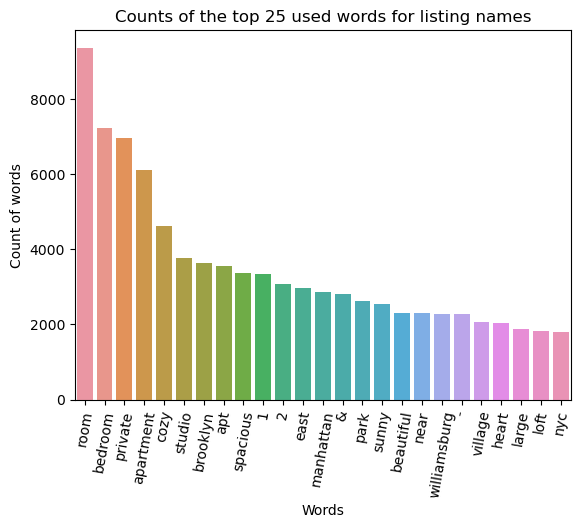

In [ ]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

NYC Airbnb Price Predictor

In [ ]:
import seaborn as sns
from scipy.stats import norm

/var/folders/_j/w8xm7s8n3ql77s5f6rllf_kc0000gn/T/ipykernel_76970/3151232289.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price_log'], fit=norm)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

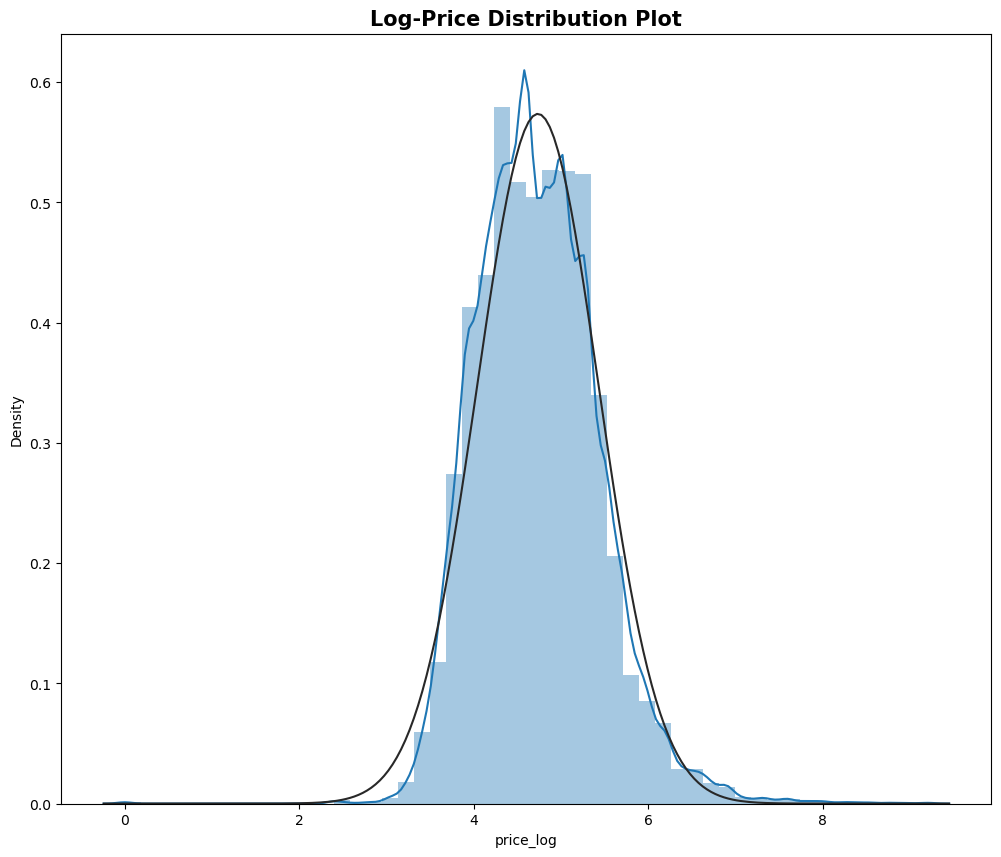

In [ ]:
data['price_log'] = np.log(data.price+1)
plt.figure(figsize=(12,10))
sns.distplot(data['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [ ]:
model = data
original_categories = model['neighbourhood_group'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")
X.shape
original_categories = model['neighbourhood'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")
    
original_categories = model['room_type'].astype("category").cat.categories

# Print the mapping between original values and codes
for original_value, code in zip(original_categories, range(len(original_categories))):
    print(f"Original Value: {original_value} | Code: {code}")

    # change the non-nominial value using cat.code
model['neighbourhood_group']= model['neighbourhood_group'].astype("category").cat.codes
model['neighbourhood'] = model['neighbourhood'].astype("category").cat.codes
model['room_type'] = model['room_type'].astype("category").cat.codes
model.info()

Original Value: Bronx | Code: 0
Original Value: Brooklyn | Code: 1
Original Value: Manhattan | Code: 2
Original Value: Queens | Code: 3
Original Value: Staten Island | Code: 4
Original Value: Allerton | Code: 0
Original Value: Arden Heights | Code: 1
Original Value: Arrochar | Code: 2
Original Value: Arverne | Code: 3
Original Value: Astoria | Code: 4
Original Value: Bath Beach | Code: 5
Original Value: Battery Park City | Code: 6
Original Value: Bay Ridge | Code: 7
Original Value: Bay Terrace | Code: 8
Original Value: Bay Terrace, Staten Island | Code: 9
Original Value: Baychester | Code: 10
Original Value: Bayside | Code: 11
Original Value: Bayswater | Code: 12
Original Value: Bedford-Stuyvesant | Code: 13
Original Value: Belle Harbor | Code: 14
Original Value: Bellerose | Code: 15
Original Value: Belmont | Code: 16
Original Value: Bensonhurst | Code: 17
Original Value: Bergen Beach | Code: 18
Original Value: Boerum Hill | Code: 19
Original Value: Borough Park | Code: 20
Original Val

In [ ]:
X = model[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]
y = data['price_log']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

# We check the shape of our X and y 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39086, 10)
(39086,)
(9772, 10)
(9772,)


In [ ]:
## Now we build our model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
model = keras.Sequential() #Instantiate the model
model.add(Input(shape=(X_train.shape[1],))) ## INPUT layer
model.add(Dense(200, activation = 'relu')) ## Hidden layer 1
model.add(Dense(200, activation = 'relu')) ## Hidden layer 2
model.add(Dense(200, activation = 'relu')) ## Hidden layer 3
model.add(Dense(200, activation = 'relu')) ## Hidden layer 4
model.add(Dense(1, activation = 'linear')) ## OUTPUT layer
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 200)            │         2,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,001 (480.47 KB)

 Trainable params: 123,001 (480.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 3, batch_size = 128, validation_split = 0.2)

Epoch 1/3
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12.2372 - mean_squared_error: 12.2372 - val_loss: 0.5139 - val_mean_squared_error: 0.5139
Epoch 2/3
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4664 - mean_squared_error: 0.4664 - val_loss: 0.4342 - val_mean_squared_error: 0.4342
Epoch 3/3
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4349 - mean_squared_error: 0.4349 - val_loss: 0.4722 - val_mean_squared_error: 0.4722


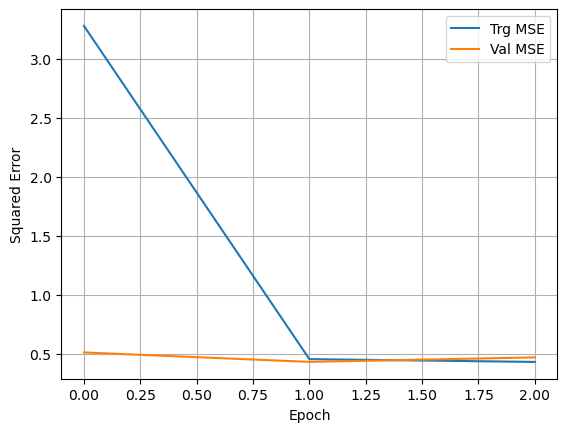

In [ ]:
plt.plot(history.history['mean_squared_error'], label='Trg MSE')
plt.plot(history.history['val_mean_squared_error'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('Squared Error')
plt.legend()
plt.grid(True)

In [ ]:
## Perform predictions

y_pred = model.predict(X_test)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


In [ ]:
## With the predictions in hand, we can calculate RMSE and other evaluation metrics

print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  0.4615463119364123
RMSE =  0.6793719981986396
MAE =  0.5364732398872764


Text(0, 0.5, 'Predicted')

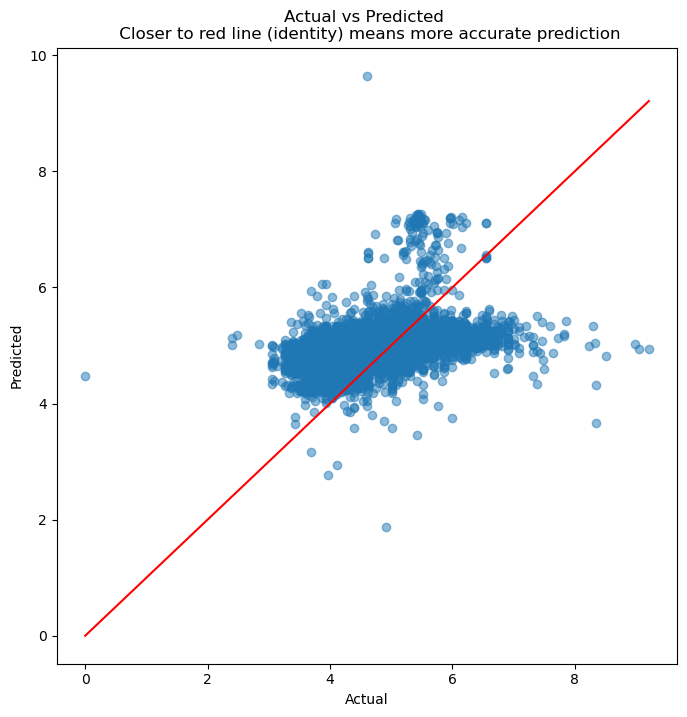

In [ ]:
## Next, we scatterplot the actuals against the predictions

plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted \n Closer to red line (identity) means more accurate prediction')
plt.plot( [y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [ ]:
from sklearn import tree
# model = tree.DecisionTreeRegressor()
model = tree.DecisionTreeRegressor(max_depth=9)
model = model.fit(X_train, y_train)
model.predict(X_test)

array([5.53859429, 3.82475436, 4.05547143, ..., 4.05547143, 5.19309678,
       5.33100313])

In [ ]:
print(model.tree_.max_depth)

y_pred  =  model.predict(X_test)

print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

9
MSE =  0.2119372639923542
RMSE =  0.46036644533714033
MAE =  0.3263207171224703


In [ ]:
# Just checking to see if we have everything working right

print('Count of predictions:', len(y_pred))
print('Count of ground truth labels:', len(y_test))

Count of predictions: 9772
Count of ground truth labels: 9772


Text(0, 0.5, 'Predicted')

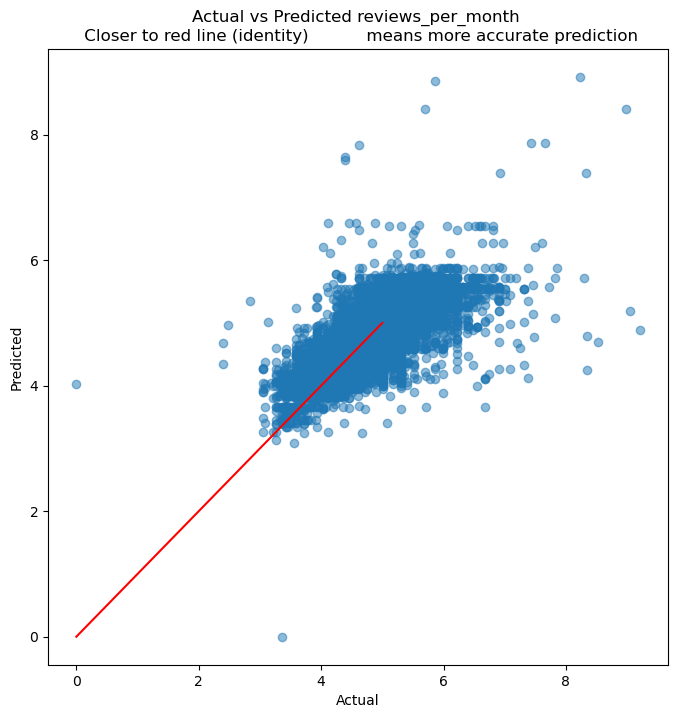

In [ ]:
# We plot the actual home prices vs the predictions in a scatterplot

plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted reviews_per_month \n Closer to red line (identity) \
          means more accurate prediction')
plt.plot( [0,5],[0,5], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")